In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datafoobars import drop_personal_data, drop_goalkeeper_data, drop_categorical_data

In [5]:
fifa17_raw_data = pd.read_csv("data/FIFA17_official_data.csv")
fifa18_raw_data = pd.read_csv("data/FIFA18_official_data.csv")
fifa19_raw_data = pd.read_csv("data/FIFA19_official_data.csv")
fifa20_raw_data = pd.read_csv("data/FIFA20_official_data.csv")
fifa21_raw_data = pd.read_csv("data/FIFA21_official_data.csv")

old_raw_data = pd.concat([fifa17_raw_data, fifa18_raw_data, fifa19_raw_data, fifa20_raw_data, fifa21_raw_data], ignore_index=True)
old_raw_data.shape

(87642, 65)

In [6]:
old_raw_data = drop_personal_data(old_raw_data)
old_raw_data = drop_goalkeeper_data(old_raw_data)
old_raw_data = drop_categorical_data(old_raw_data)

old_raw_data.dropna(inplace=True)

       Overall  Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  \
0           92      77.0       94.0             77.0          83.0     88.0   
1           86      73.0       76.0             59.0          84.0     75.0   
2           87      76.0       77.0             81.0          84.0     78.0   
3           86      82.0       63.0             75.0          83.0     68.0   
4           88      78.0       71.0             73.0          85.0     84.0   
...        ...       ...        ...              ...           ...      ...   
87637       50      14.0        5.0             13.0          24.0      5.0   
87638       51       8.0        9.0             11.0          23.0      7.0   
87639       51      10.0        7.0             10.0          17.0      8.0   
87640       49      10.0        7.0             11.0          19.0      7.0   
87641       47      10.0        6.0             10.0          25.0      6.0   

       Dribbling  Curve  FKAccuracy  LongPassing  .

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = old_raw_data.drop("Overall", axis=1)
y= old_raw_data["Overall"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

Mean Squared Error:  10.33
R-squared:  0.79


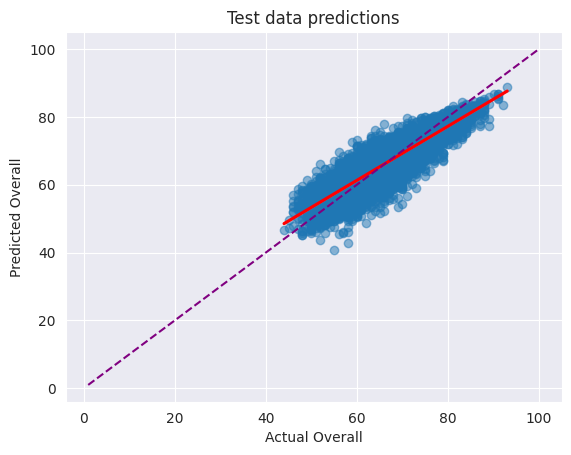

In [8]:
y_pred = reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse: .2f}")
print(f"R-squared: {r2: .2f}")

sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.plot(np.linspace(1, 100, 100), np.linspace(1, 100, 100), color="purple", linestyle="dashed")
plt.xlabel("Actual Overall")
plt.ylabel("Predicted Overall")
plt.title("Test data predictions")
plt.show();

In [9]:
pred_data = pd.read_csv("data/FIFA22_official_data.csv")

pred_data = drop_personal_data(pred_data)
pred_data = drop_goalkeeper_data(pred_data)
pred_data = drop_categorical_data(pred_data)

pred_data.dropna(inplace=True)

X_pred = pred_data.drop("Overall", axis=1)
labels = pred_data["Overall"]

Mean Squared Error:  7.86
R-squared:  0.81


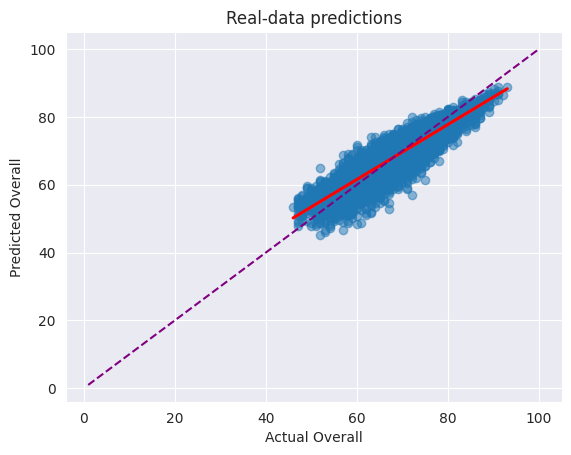

In [10]:
y_pred = reg.predict(X_pred)

mse = mean_squared_error(labels, y_pred)
r2 = r2_score(labels, y_pred)

print(f"Mean Squared Error: {mse: .2f}")
print(f"R-squared: {r2: .2f}")

sns.regplot(x=labels, y=y_pred, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.plot(np.linspace(1, 100, 100), np.linspace(1, 100, 100), color="purple", linestyle="dashed")
plt.xlabel("Actual Overall")
plt.ylabel("Predicted Overall")
plt.title("Real-data predictions")
plt.show();

In [11]:
from sklearn.model_selection import GridSearchCV, cross_val_score

param_grid = {
    "fit_intercept": [True, False],
    "copy_X": [True, False],
}

grid_search = GridSearchCV(reg, param_grid, cv=4, scoring="r2", verbose=2)

grid_search.fit(X_train, y_train)

print("Best Hyperparameters: ", grid_search.best_params_)

best_reg = grid_search.best_estimator_
cv_scores = cross_val_score(best_reg, X_train, y_train, cv=4, scoring="r2")
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {np.mean(cv_scores) :.2f}")

Fitting 4 folds for each of 4 candidates, totalling 16 fits
[CV] END ....................copy_X=True, fit_intercept=True; total time=   0.0s
[CV] END ....................copy_X=True, fit_intercept=True; total time=   0.1s
[CV] END ....................copy_X=True, fit_intercept=True; total time=   0.1s
[CV] END ....................copy_X=True, fit_intercept=True; total time=   0.1s
[CV] END ...................copy_X=True, fit_intercept=False; total time=   0.1s
[CV] END ...................copy_X=True, fit_intercept=False; total time=   0.1s
[CV] END ...................copy_X=True, fit_intercept=False; total time=   0.1s
[CV] END ...................copy_X=True, fit_intercept=False; total time=   0.1s
[CV] END ...................copy_X=False, fit_intercept=True; total time=   0.1s
[CV] END ...................copy_X=False, fit_intercept=True; total time=   0.1s
[CV] END ...................copy_X=False, fit_intercept=True; total time=   0.1s
[CV] END ...................copy_X=False, fit_int

In [12]:
best_reg.fit(X_train, y_train)

y_pred = best_reg.predict(X_test)

Mean Squared Error:  10.33
R-squared:  0.79


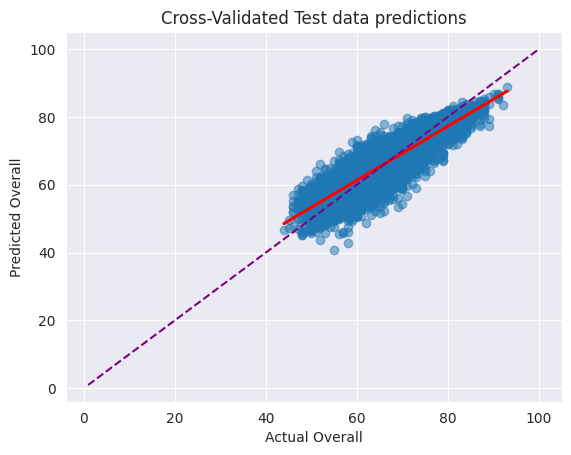

In [13]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse: .2f}")
print(f"R-squared: {r2: .2f}")

sns.regplot(x=y_test, y=y_pred, scatter_kws={"alpha":0.5}, line_kws={"color": 'red'})
plt.plot(np.linspace(1, 100, 100), np.linspace(1, 100, 100), color="purple", linestyle="dashed")
plt.xlabel("Actual Overall")
plt.ylabel("Predicted Overall")
plt.title("Cross-Validated Test data predictions")
plt.show();

Mean Squared Error:  7.86
R-squared:  0.81


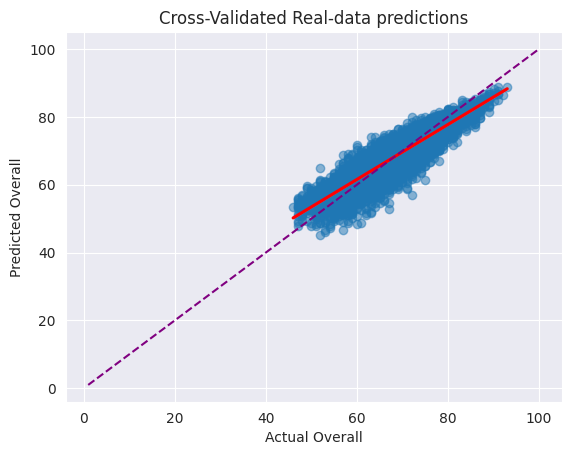

In [14]:
y_pred = best_reg.predict(X_pred)

mse = mean_squared_error(labels, y_pred)
r2 = r2_score(labels, y_pred)

print(f"Mean Squared Error: {mse: .2f}")
print(f"R-squared: {r2: .2f}")

sns.regplot(x=labels, y=y_pred, scatter_kws={"alpha":0.5}, line_kws={"color": 'red'})
plt.plot(np.linspace(1, 100, 100), np.linspace(1, 100, 100), color="purple", linestyle="dashed")
plt.xlabel("Actual Overall")
plt.ylabel("Predicted Overall")
plt.title("Cross-Validated Real-data predictions")
plt.show();